In [5]:
import pandas as pd
import seaborn as sb
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (8, 4)
sb.set(font_scale=1.)

In [6]:
DATA_FILE = "data\extrapolated_data.csv"

COLS = {
    'Region', 'Year', 'TotalTourists', 'ForeignTourists', 'HousesWithInternet%',
    'CompaniesWithWebSites%', 'AmountOfPeopleWithHighEducation',
    'PeopleWithHighEducationWithoutJob', 'AmountOfPeopleWithSecondaryEducation',
    'PeopleWithSecondaryEducationWithoutJob', 'AmountOfPeopleWithoutEducation',
    'PeopleWithoutEducationWithoutJob', 'AmountOfMales',
    'AmountOfMalesWithoutJob', 'AmountOfFemales',
    'AmountOfFemalesWithoutJob', 'AmountOfPeopleInRegion',
    'AmountOfPeopleInRegionWithoutJob', 'AmountOf_15-24_PeopleInRegion',
    'AmountOf_15-24_PeopleInRegionWithoutJob', 'AmountOf_15-64_PeopleInRegion',
    'AmountOf_15-64_PeopleInRegionWithoutJob', 'AmountOf_25-34_PeopleInRegion',
    'AmountOf_25-34_PeopleInRegionWithoutJob', 'AmountOf_35-44_PeopleInRegion',
    'AmountOf_35-44_PeopleInRegionWithoutJob', 'AmountOf_45-54_PeopleInRegion',
    'AmountOf_45-54_PeopleInRegionWithoutJob', 'AmountOf_55-64_PeopleInRegion',
    'AmountOf_55-64_PeopleInRegionWithoutJob', 'AmountOf_65+_PeopleInRegion'
}

DEPENDENT_COL = 'TotalTourists'

INDEX_COLS = {'Region', 'Year'}

REGIONS = { 
    "РЕПУБЛИКА СРБИЈА",
    "Београдски регион", 
    "Регион Војводине", 
    "Регион Шумадије и Западне Србије", 
    "Регион Јужне и Источне Србије" 
}

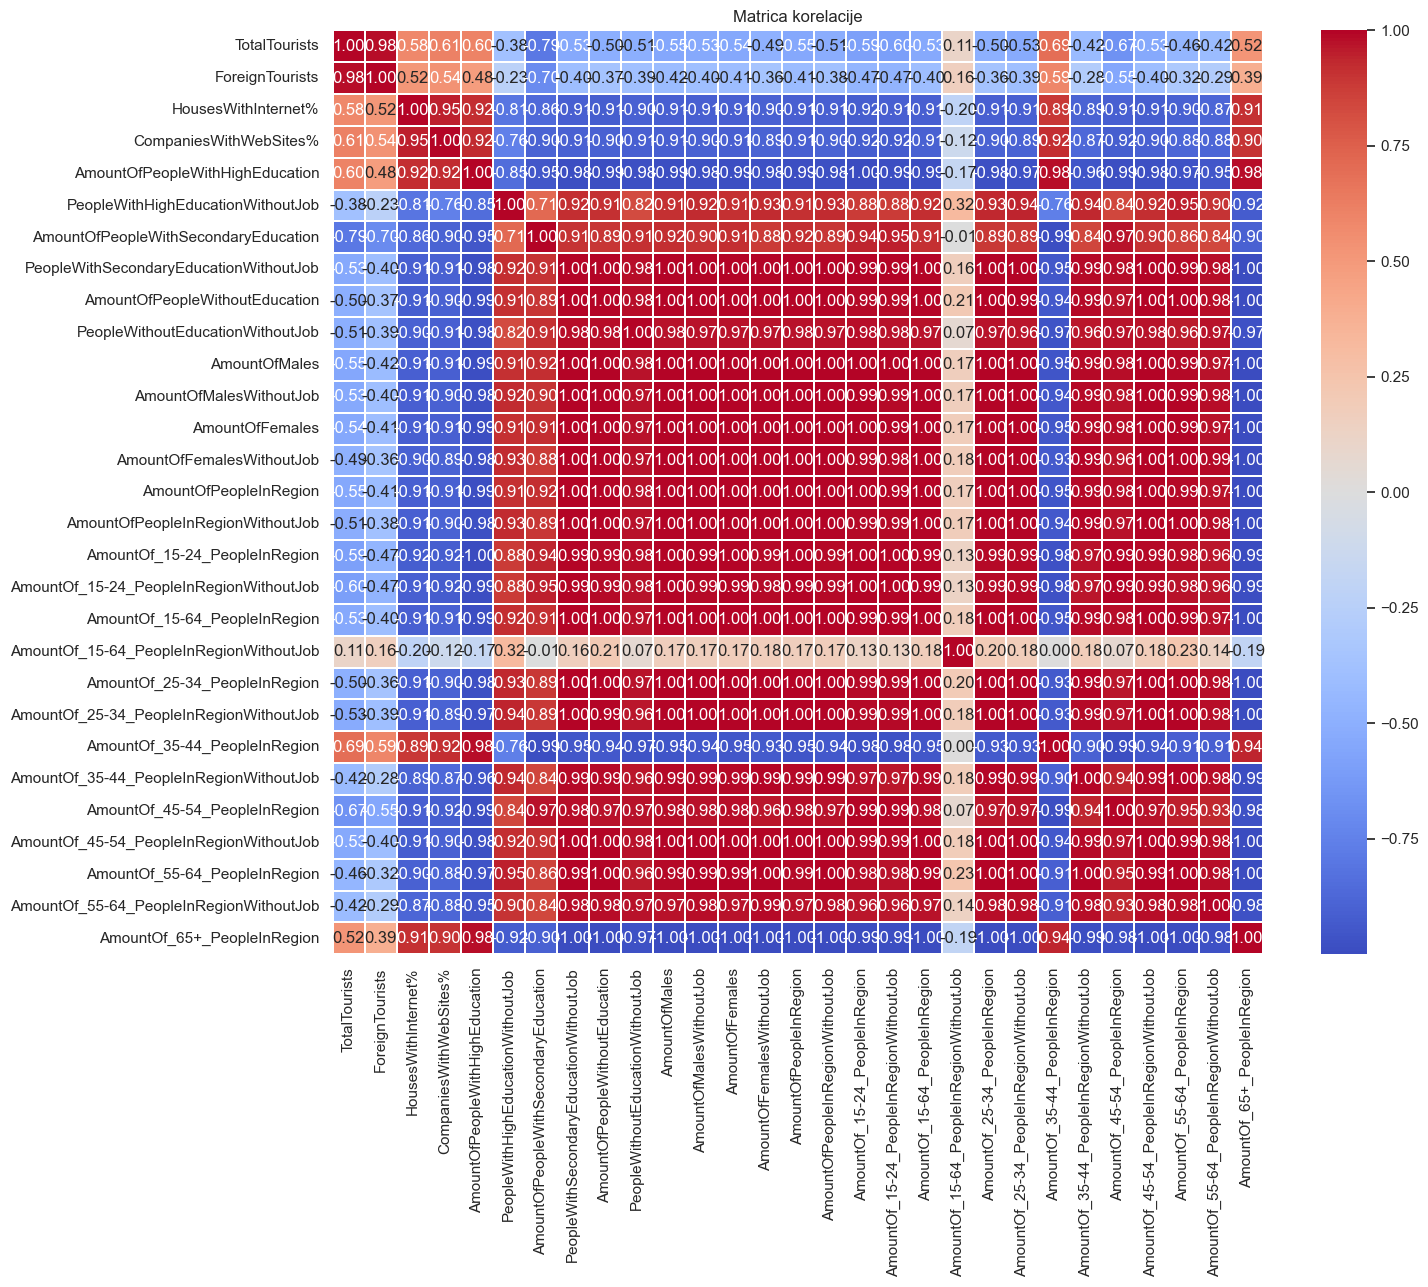

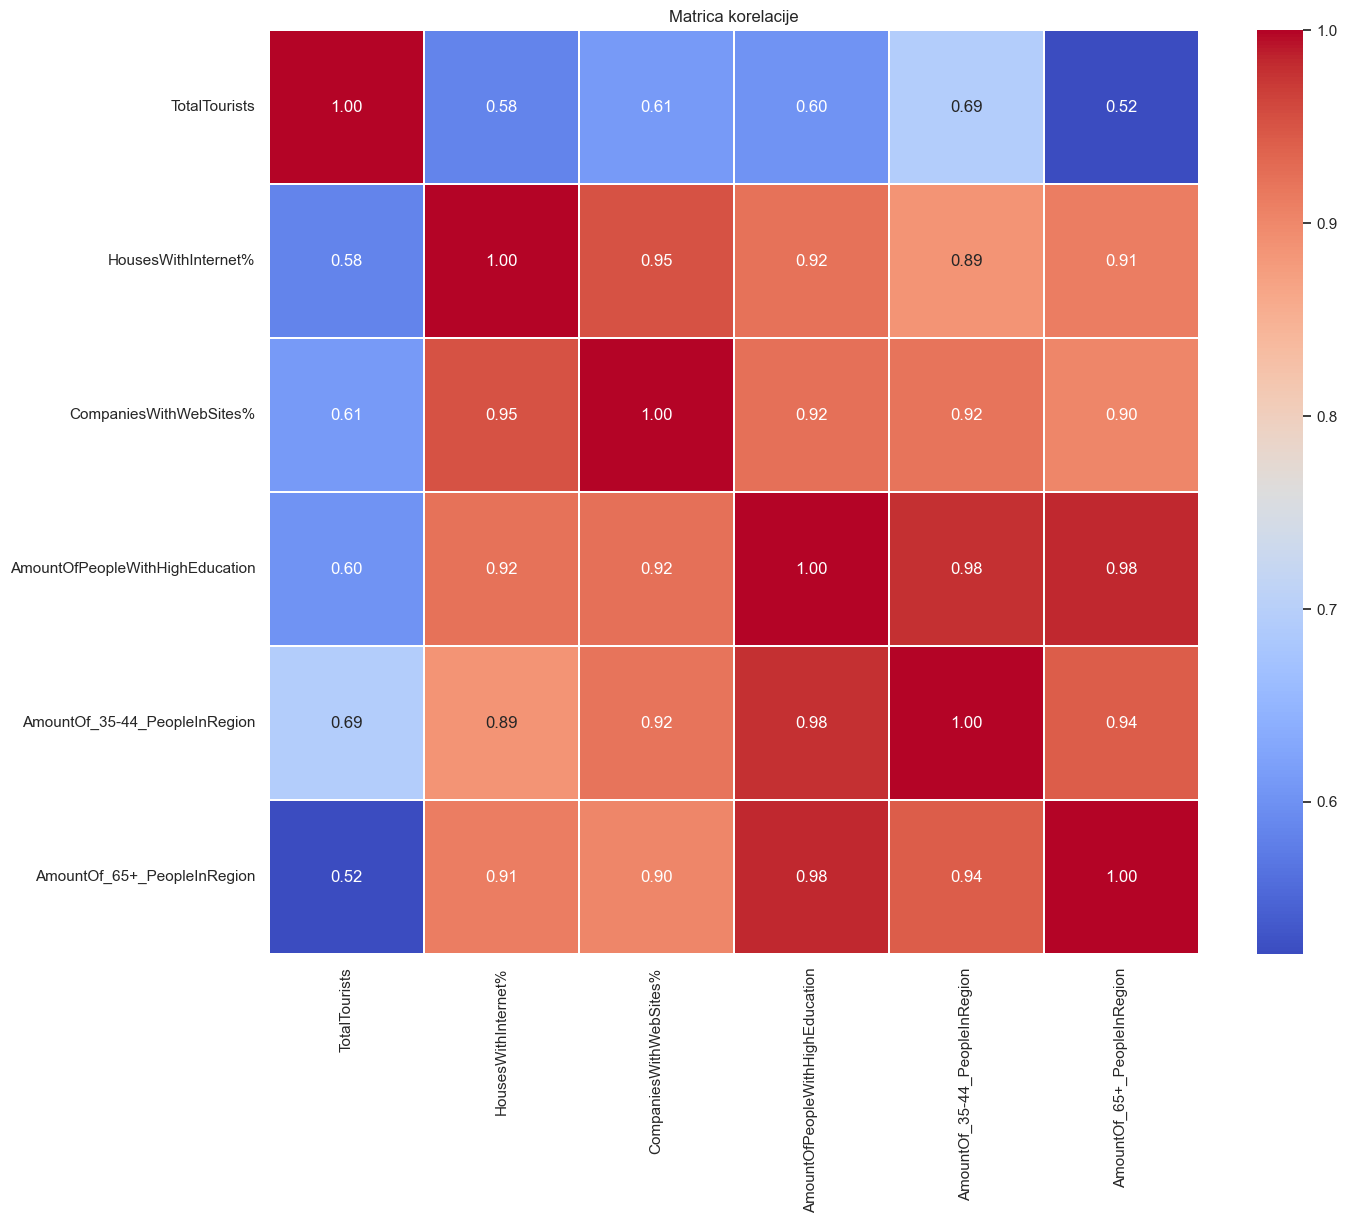

C:\Users\maxim\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,,TotalTourists,ForeignTourists,HousesWithInternet%,CompaniesWithWebSites%,AmountOfPeopleWithHighEducation,PeopleWithHighEducationWithoutJob,AmountOfPeopleWithSecondaryEducation,PeopleWithSecondaryEducationWithoutJob,AmountOfPeopleWithoutEducation,PeopleWithoutEducationWithoutJob,...,AmountOf_15-64_PeopleInRegionWithoutJob,AmountOf_25-34_PeopleInRegion,AmountOf_25-34_PeopleInRegionWithoutJob,AmountOf_35-44_PeopleInRegion,AmountOf_35-44_PeopleInRegionWithoutJob,AmountOf_45-54_PeopleInRegion,AmountOf_45-54_PeopleInRegionWithoutJob,AmountOf_55-64_PeopleInRegion,AmountOf_55-64_PeopleInRegionWithoutJob,AmountOf_65+_PeopleInRegion
Year,Region,,,,,,,,,,,,,,,,,,,,,
2010,РЕПУБЛИКА СРБИЈА,2000597,682681,27.6,67.5,1039600.0,110300.0,3141700.0,397200.0,1917900.0,100600.0,...,607400.0,958500.0,198400.0,973300.0,134600.0,976700.0,108100.0,1110500.0,57500.0,1275800.0
2011,РЕПУБЛИКА СРБИЈА,2068610,764167,31.0,67.6,1039600.0,110300.0,3141700.0,397200.0,1917900.0,100600.0,...,607400.0,958500.0,198400.0,973300.0,134600.0,976700.0,108100.0,1110500.0,57500.0,1275800.0
2012,РЕПУБЛИКА СРБИЈА,2079643,809967,38.0,73.8,1039600.0,110300.0,3141700.0,397200.0,1917900.0,100600.0,...,607400.0,958500.0,198400.0,973300.0,134600.0,976700.0,108100.0,1110500.0,57500.0,1275800.0
2013,РЕПУБЛИКА СРБИЈА,2192435,921768,43.4,73.8,1039600.0,110300.0,3141700.0,397200.0,1917900.0,100600.0,...,607400.0,958500.0,198400.0,973300.0,134600.0,976700.0,108100.0,1110500.0,57500.0,1275800.0
2014,РЕПУБЛИКА СРБИЈА,2192268,1028732,55.1,74.0,1039600.0,110300.0,3141700.0,397200.0,1917900.0,100600.0,...,607400.0,958500.0,198400.0,973300.0,134600.0,976700.0,108100.0,1110500.0,57500.0,1275800.0
2015,РЕПУБЛИКА СРБИЈА,2437165,1132221,56.0,75.2,1087700.0,116000.0,3120600.0,355900.0,1851600.0,80000.0,...,550900.0,943500.0,181700.0,978400.0,123400.0,960700.0,94700.0,1090400.0,52800.0,1307100.0
2016,РЕПУБЛИКА СРБИЈА,2753591,1281426,57.8,80.8,1114000.0,108700.0,3099200.0,309500.0,1804400.0,71200.0,...,488300.0,926200.0,161000.0,982700.0,117500.0,944400.0,84900.0,1066800.0,44900.0,1340700.0
2017,РЕПУБЛИКА СРБИЈА,3085866,1497173,61.9,80.4,1122700.0,98900.0,3086700.0,274300.0,1775300.0,62000.0,...,1537700.0,913000.0,140100.0,985500.0,102800.0,930600.0,75900.0,1049300.0,41800.0,1366200.0
2018,РЕПУБЛИКА СРБИЈА,3430522,1710514,72.5,82.6,1149800.0,90200.0,3074900.0,256300.0,1730400.0,65700.0,...,411000.0,899900.0,129800.0,986000.0,99600.0,922300.0,71100.0,1029700.0,45700.0,1390100.0


In [11]:
df = pd.read_csv(DATA_FILE, index_col=tuple(INDEX_COLS)).dropna()

region_dfs = df[df.index.get_level_values("Region") != "РЕПУБЛИКА СРБИЈА"].groupby("Region")
serbia_df = df[df.index.get_level_values("Region") == "РЕПУБЛИКА СРБИЈА"]

x = serbia_df.drop(columns=['TotalTourists'])
y = serbia_df['TotalTourists']

x_with_const = sm.add_constant(x)
all_vars_model = sm.OLS(y, x_with_const).fit()

correlation_matrix = serbia_df.corr() # racunamo matricu korelacije
plt.figure(figsize=(15, 12))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Matrica korelacije')
plt.show()
# 
# unused_columns = set()
# for region in correlation_matrix.TotalTourists:
#     if float(region[1]) < 0.2:
#         unused_columns.add(region[0])
unused_columns = set()
for region in correlation_matrix.index:
    if correlation_matrix.loc[region, 'TotalTourists'] < 0.2:
        unused_columns.add(region)

serbia_df_ac = serbia_df.drop(columns=unused_columns).drop(columns=['ForeignTourists'])

x = serbia_df_ac.drop(columns=['TotalTourists'])
y = serbia_df_ac['TotalTourists']

x_with_const = sm.add_constant(x)
all_vars_model = sm.OLS(y, x_with_const).fit()

correlation_matrix = serbia_df_ac.corr() # racunamo matricu korelacije
plt.figure(figsize=(15, 12))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title('Matrica korelacije')
plt.show()
# NOTE: here we could do extrapolation, for now we dropped all na
all_vars_model.summary()
serbia_df.head(11)

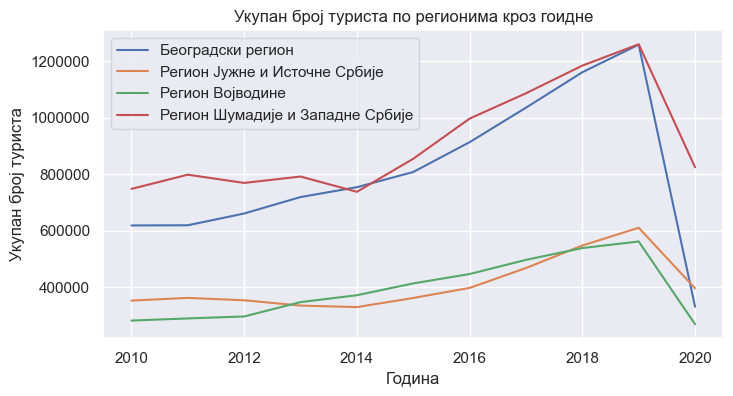

In [8]:
for region, region_df in region_dfs:
    plt.plot(region_df.index.get_level_values("Year"), region_df["TotalTourists"], label=region)

plt.xlabel("Година")
plt.ylabel("Укупан број туриста")
plt.title("Укупан број туриста по регионима кроз гоидне")
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.show()

In [ ]:
for region, region_df in region_dfs:
    plt.plot(region_df.index.get_level_values("Year"), region_df["TotalTourists"], label=region)

plt.xlabel("Година")
plt.ylabel("Укупан број туриста")
plt.title("Укупан број туриста по регионима кроз гоидне")
plt.ticklabel_format(style='plain')
plt.legend(loc='upper left')
plt.show()

In [9]:
def get_fitted_model(x, y):
    x_with_const = sm.add_constant(x)
    model = sm.OLS(y, x_with_const).fit()
    return model

In [1]:
# model
REGION = "Београдски регион"
region_df = region_dfs.get_group(REGION)
x = region_df[COLS - INDEX_COLS - {DEPENDENT_COL}]
y = region_df[DEPENDENT_COL]

model = get_fitted_model(x, y)
model.summary()

NameError: name 'region_dfs' is not defined

In [ ]:
correlation_matrix = region_df.corr()

sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.1)
plt.title("Матрица корелације")
plt.show()

In [251]:
alpha = 5e-2

if model.f_pvalue <= alpha:
    print('bar jedna promenljiva X ima linearnu zavisnost sa promenljivom Y')
else:
    print('moguce je da ni jedna promenljiva nema znacajnu linearnu zavisnost sa Y')

model.rsquared # ??

moguce je da ni jedna promenljiva nema znacajnu linearnu zavisnost sa Y


1.0